# 统计学：决策的科学项目说明

说明：点此查看此文档的英文版本。

## 背景信息
在一个 Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

## 调查问题
作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

**1**. 我们的自变量是什么？因变量是什么？

自变量：文字与颜色匹配与否的文字条件

因变量：说出文字墨色名称所花费的时间


**2**. 此任务的适当假设集是什么？你想执行什么类型的统计测试？为你的选择提供正当理由。

假设每个人都是认真参与该任务，并且对颜色的识别无误；

我想针对不同年龄段的人做随机统计测试；

大脑的反应速度跟年龄、IQ有一定的关系。

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。



In [4]:
# 导入所有需要的函数
import csv
from datetime import datetime
import numpy as np
import pandas as pd
# visualizations module from babs :)
from visualizations import show_max_min, usage_plot 
from IPython.display import display
%matplotlib inline

In [5]:
sample_data = pd.read_csv('stroopdata.csv')
display(sample_data.head())

,Congruent,Incongruent
0,8.630,15.687
1,8.987,17.394
2,9.401,20.762
3,9.564,21.214
4,10.639,20.429


In [6]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 456.0 bytes


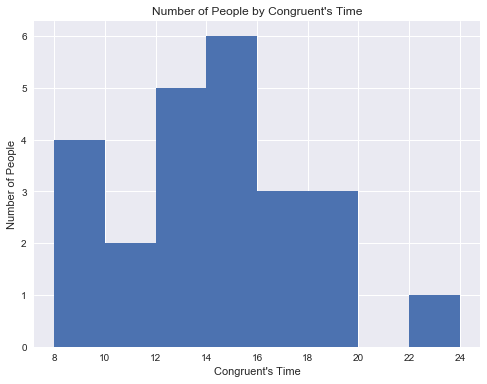

In [15]:
usage_plot(sample_data, 'Congruent', boundary = 8, bin_width = 2)

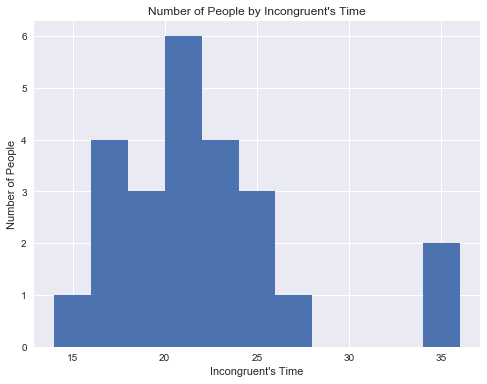

In [16]:
usage_plot(sample_data, 'Incongruent', boundary = 10, bin_width = 2)

In [9]:
show_max_min(sample_data, 'Congruent')
show_max_min(sample_data, 'Incongruent')

data:Congruent max:22.328, min:8.63
data:Incongruent max:35.255, min:15.687


**3**.	报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

**答**：说出文字墨色名称所花费的时间，Congruent条件下人数最多的是14~16s分组，而Incongruent条件下人数最多的是20~22s；说出文字墨色名称所花费的时间，Congruent条件下是：max:22.328, min:8.63；而Incongruent条件下是：max:35.255, min:15.687。

**4**. 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

**答**: 对比两个Congruent和Incongruent条件下的分布图，大部分人在Incongruent条件花的时间较长，而Congruent条件下花的时间较短。

**5**. 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

**答**：置信水平还算比较高，虽然样本有点少，但是大体上符合正态分布。与我期望的一致，我自己试着做下这样的小测验，发现自己在Incongruent下花的时间较长，我猜测大多数人也是如此。

**6**. 可选：你觉得导致所观察到的效应的原因是什么？你是否能想到会取得类似效应的替代或类似任务？进行一些调查研究将有助于你思考这两个问题！

**答**: 在“一致文字条件”下，颜色和含义的识别没有冲突，甚至可以在颜色不做过多的思考，只需要识别文字即可。在“不一致文字条件”下，颜色和含义的识别是有冲突的，大脑需要化更多的时间识别这样的冲突后找出正确答案。类似任务：参与者在1s内看着数字板口头回答加减乘除法。一致答案是看着2，让参与者口头回答1+1的答案；不一致答案是看着3，口头回答1+1的答案。